**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRES Y MATRÍCULAS:

-Daniela Gómez Escamilla A01795312

-Francisco Antonio Enríquez Cabrera A01795006

-Juan Manuel Carballo Montaño A01166758

-Kurt Damián Yáñez Badelt A00394053

In [1]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y Analítica de Datos/Semana 7/"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [4]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [5]:
print('A continuación, se muestran las estadísticas descriptivas de las variables numéricas:')
cereals_df.describe().T

A continuación, se muestran las estadísticas descriptivas de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [6]:
#Se convierte la variable shelf de numérica a object
cereals_df['shelf'] = cereals_df['shelf'].values.astype('object')

In [7]:
print('A continuación, se muestran las estadísticas descriptivas de las variables categóricas:')
cereals_df.describe(include="object").T

A continuación, se muestran las estadísticas descriptivas de las variables categóricas:


,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74
shelf,77,3,3,36


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

A continuación, se muestran histogramas de las variables mfr y shelf (fabricante y estante de exhibición):


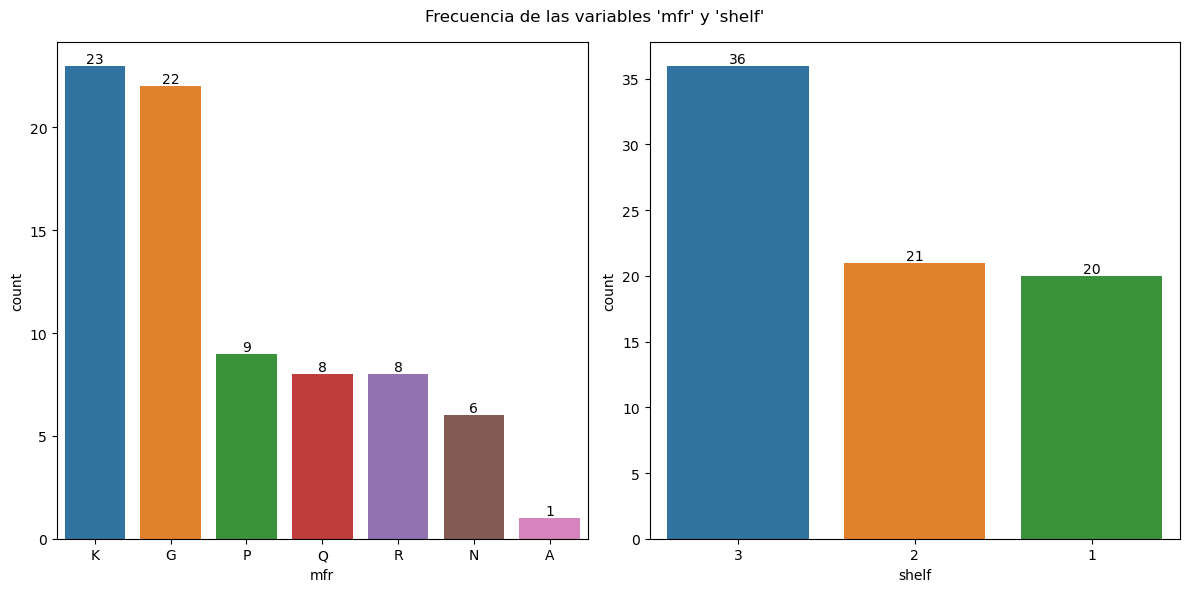

In [8]:
print('A continuación, se muestran histogramas de las variables mfr y shelf (fabricante y estante de exhibición):')
fig, ax = plt.subplots(1, 2, figsize=(12,6))

for ax, col in zip(ax, ['mfr', 'shelf']):
    sns.countplot(cereals_df, x=col, ax=ax, order=cereals_df[col].value_counts().index)
    for container in ax.containers:
        ax.bar_label(container)

plt.suptitle("Frecuencia de las variables 'mfr' y 'shelf'")
fig.tight_layout()

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

A continuación, se muestra un histograma de la frecuencia de productos por fabricante por estante


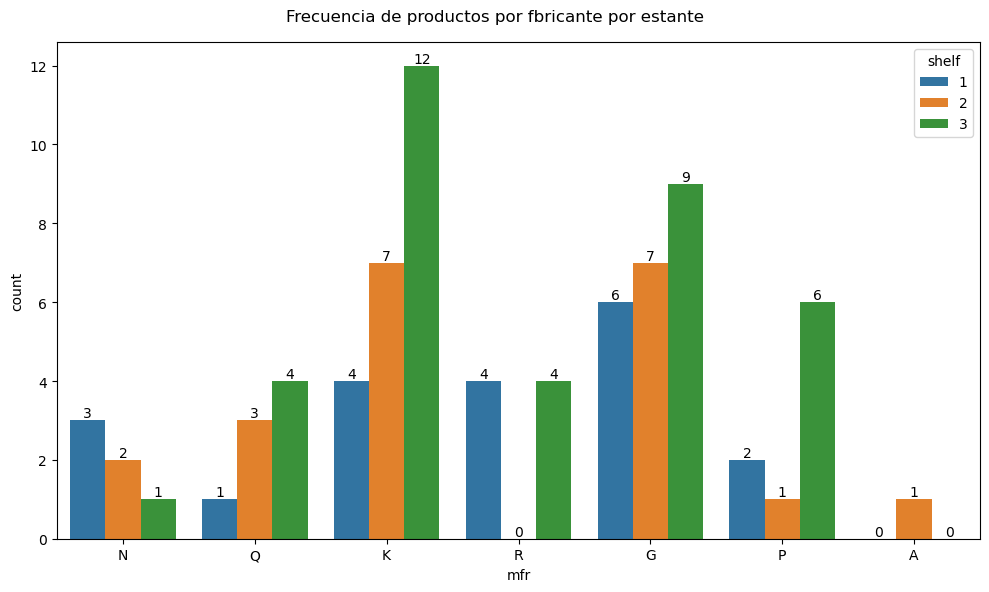

In [9]:
print('A continuación, se muestra un histograma de la frecuencia de productos por fabricante por estante')
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.countplot(cereals_df, x='mfr', hue='shelf', ax=ax)
for container in ax.containers:
    ax.bar_label(container)

fig.suptitle("Frecuencia de productos por fbricante por estante")
fig.tight_layout()

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

El bin (one-based-index) con mayor frecuencia es el 3


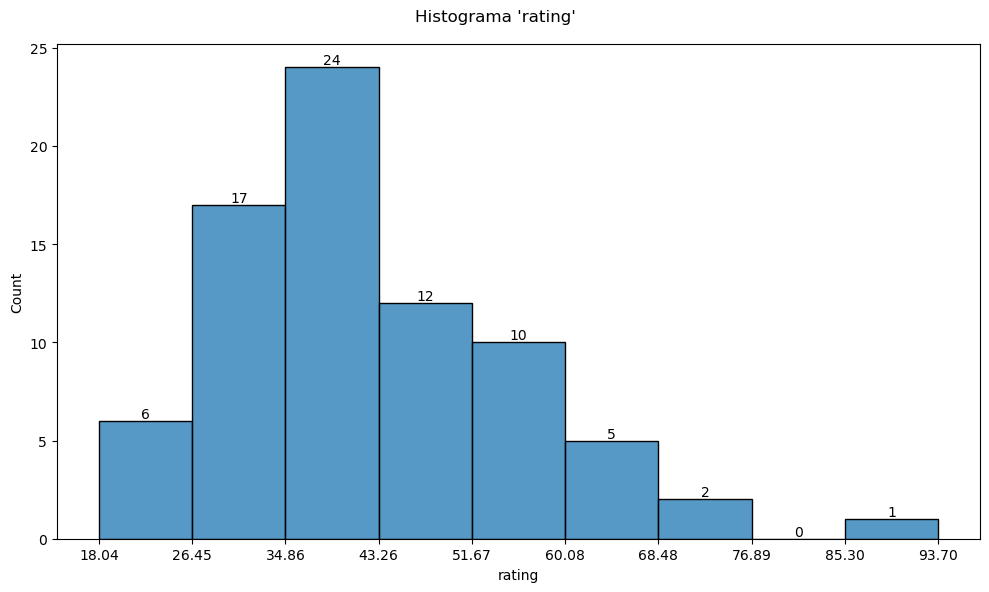

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.histplot(cereals_df, x='rating', bins=9, ax=ax)

bins = np.round(np.histogram_bin_edges(cereals_df['rating'].to_numpy(), bins=9), 2)

for container in ax.containers:
    ax.bar_label(container)
    argmax = container.datavalues.argmax()

plt.xticks(bins)

fig.suptitle("Histograma 'rating'")
fig.tight_layout()

print(f"El bin (one-based-index) con mayor frecuencia es el {argmax + 1}")

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [11]:
print('A continuación, se muestran los 10 cereales mejor evaluados, su rating y a qué fabricante corresponden:')
cereals_df[['mfr', 'name', 'rating']].sort_values('rating', ascending=False)[:10]

A continuación, se muestran los 10 cereales mejor evaluados, su rating y a qué fabricante corresponden:


,mfr,name,rating
3,K,All-Bran_with_Extra_Fiber,93.704912
64,N,Shredded_Wheat_'n'Bran,74.472949
65,N,Shredded_Wheat_spoon_size,72.801787
0,N,100%_Bran,68.402973
63,N,Shredded_Wheat,68.235885
20,N,Cream_of_Wheat_(Quick),64.533816
55,Q,Puffed_Wheat,63.005645
54,Q,Puffed_Rice,60.756112
50,K,Nutri-grain_Wheat,59.642837
2,K,All-Bran,59.425505


A continuación, se muestran gráficamente los 10 cereales mejor evaluados:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'All-Bran_with_Extra_Fiber'),
  Text(1, 0, "Shredded_Wheat_'n'Bran"),
  Text(2, 0, 'Shredded_Wheat_spoon_size'),
  Text(3, 0, '100%_Bran'),
  Text(4, 0, 'Shredded_Wheat'),
  Text(5, 0, 'Cream_of_Wheat_(Quick)'),
  Text(6, 0, 'Puffed_Wheat'),
  Text(7, 0, 'Puffed_Rice'),
  Text(8, 0, 'Nutri-grain_Wheat'),
  Text(9, 0, 'All-Bran')])

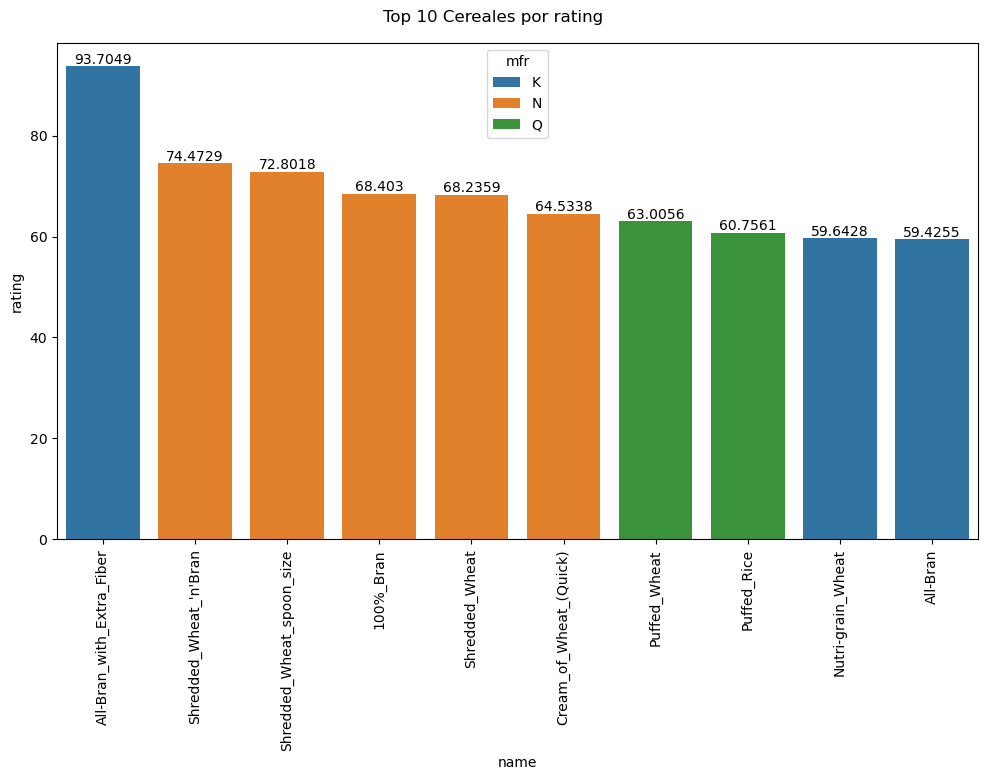

In [12]:
print('A continuación, se muestran gráficamente los 10 cereales mejor evaluados:')
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.barplot(cereals_df.sort_values(by='rating', ascending=False)[:10], x='name', y='rating', hue='mfr', ax=ax, dodge = False)
ax.legend(title='mfr', loc='upper center')

for container in ax.containers:
    ax.bar_label(container)

fig.suptitle("Top 10 Cereales por rating")
fig.tight_layout()
plt.xticks(rotation=90)

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

A continuación, se muestra gráficamente mediante diagramaas de caja la distribución de calorías de los cereales por fabricante:


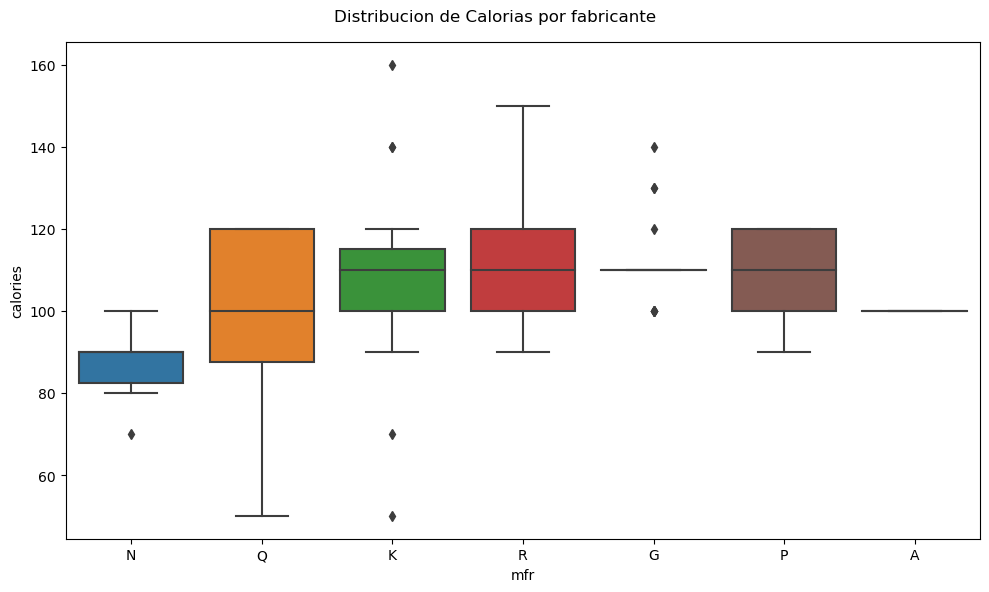

In [13]:
print('A continuación, se muestra gráficamente mediante diagramaas de caja la distribución de calorías de los cereales por fabricante:')
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.boxplot(cereals_df, x="mfr", y="calories")
fig.suptitle("Distribucion de Calorias por fabricante")
fig.tight_layout()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

A continuación, se muestra un mapa de calor con base en las correlaciones de todas las variables del dataframe:


<Axes: >

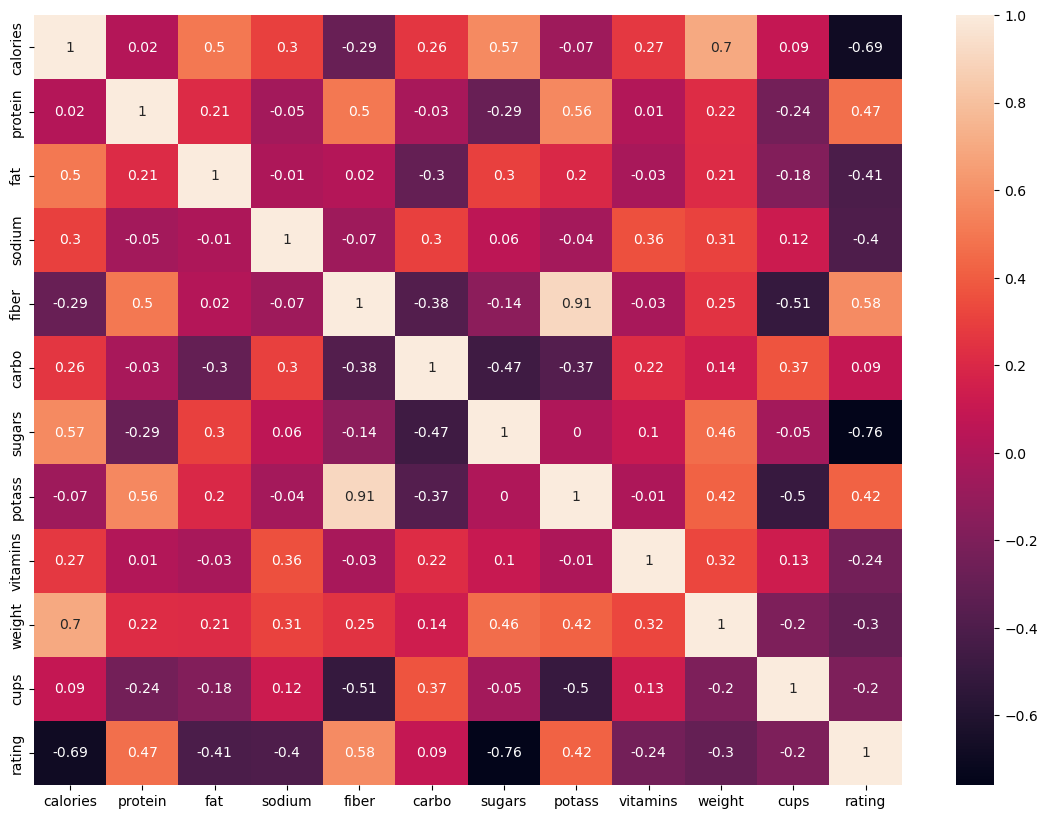

In [14]:
print("A continuación, se muestra un mapa de calor con base en las correlaciones de todas las variables del dataframe:")
plt.figure(figsize = (14, 10))
sns.heatmap(round(cereals_df.corr(numeric_only=True),2), annot = True)

Como se puede observar en el mapa de calor, las variables que tienen mayor correlacion con rating son:

* Proteina con 0.47
* Fibra con 0.58

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [15]:
#Se eliminan todos los registros con algún dato faltante y se reinicia el índice
cereals_df.dropna(axis=0, inplace=True)
cereals_df.reset_index(drop=True, inplace=True)

In [16]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74 non-null     object 
 1   mfr       74 non-null     object 
 2   type      74 non-null     object 
 3   calories  74 non-null     int64  
 4   protein   74 non-null     int64  
 5   fat       74 non-null     int64  
 6   sodium    74 non-null     int64  
 7   fiber     74 non-null     float64
 8   carbo     74 non-null     float64
 9   sugars    74 non-null     float64
 10  potass    74 non-null     float64
 11  vitamins  74 non-null     int64  
 12  shelf     74 non-null     object 
 13  weight    74 non-null     float64
 14  cups      74 non-null     float64
 15  rating    74 non-null     float64
dtypes: float64(7), int64(5), object(4)
memory usage: 9.4+ KB


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [17]:
#Se colocan en X los valores numéricos del dataframe y en y la variable a predecir (rating)
X = cereals_df.select_dtypes(include=[np.number]).drop(columns=['rating'])
total_components = X.shape[1]

#Se usa StandardScaler para estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

#Se proyectan los datos en un nuevo espacio de vectores
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=X.columns)

In [18]:
Y = cereals_df.loc[:,'rating']

In [19]:
X_pca_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,5.041308,2.470097,-0.054581,-1.129434,0.667588,0.640401,0.022399,0.059205,0.026325,0.250917,0.021692
1,1.503568,-0.310316,-3.014154,3.202758,1.344651,0.066992,-0.396573,-1.228817,-0.594837,0.042521,-0.096381
2,4.866598,1.946814,0.869813,-1.225550,0.358265,1.832924,-0.232872,0.017511,0.116766,-0.493001,-0.031211
3,5.468886,3.899001,1.883856,-1.628993,0.601691,0.374002,-0.811525,-1.003853,0.063792,0.720550,0.101563
4,0.088378,-0.391583,-1.490079,0.054716,0.331903,0.848360,0.271351,0.033091,-0.183945,0.169367,-0.050918
...,...,...,...,...,...,...,...,...,...,...,...
69,-1.442524,-0.260808,1.160446,0.531351,-1.053122,0.817503,0.665223,-0.280993,0.054940,-0.344181,0.089951
70,-1.634842,-0.417530,-1.672206,-0.593553,0.134293,-0.082682,-0.257906,-0.161360,-0.099496,0.099663,0.098120
71,0.389697,0.475626,1.182007,0.334499,-0.494861,0.820825,0.328101,0.005608,0.045088,-0.031525,0.078019
72,-0.172304,0.491070,1.163945,0.580625,0.146570,0.290806,-0.627485,-0.334248,-0.067364,0.084460,0.047027


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

Text(0, 0.5, '% Cumulative Variance Explained')

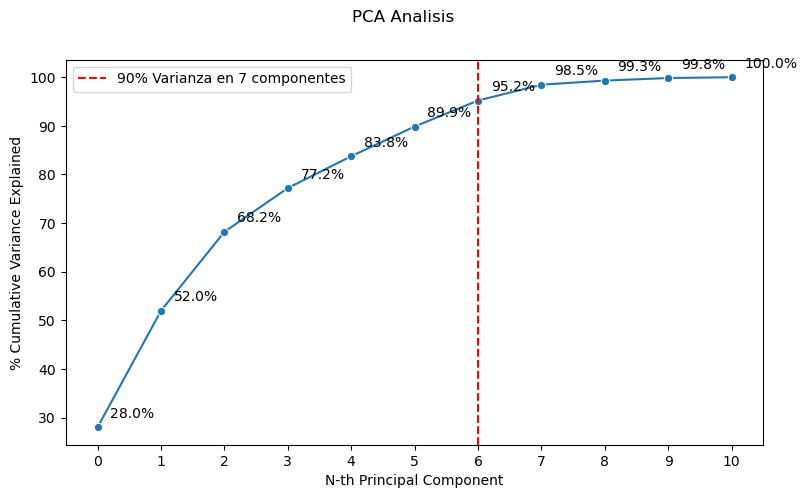

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))

y_cumsum = np.cumsum(pca.explained_variance_ratio_) * 100;
x_pc = range(total_components)

sns.lineplot(y_cumsum, marker='o', ax=ax)
for x, y in zip(x_pc, y_cumsum):
    ax.text(x + 0.2, y + 2, "%0.1f%s"%(y, "%"))

n_components_90 = np.argmax(y_cumsum >= 90) + 1

plt.xticks(np.arange(0,total_components,1))
plt.axvline(x=n_components_90 - 1, color='r', linestyle='--', label=f'90% Varianza en {n_components_90} componentes')
plt.legend()
plt.suptitle('PCA Analisis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')

Con base en la gráfica, **el número mínimo de componentes para explicar el 95 % de varianza es 7.**

In [21]:
print('Con base en la gráfica y el cálculo del número de componentes mínimo para una varianza del 90 % es de {}, a continuación se muestran estos componentes:'.format(n_components_90))
pc_df = pd.DataFrame(abs(pca.components_[:n_components_90]), columns = X.columns, index=['PC{}'.format(i) for i in range(1, n_components_90 + 1) ])
pc_90_df = pc_df.iloc[:n_components_90]
pc_90_df

Con base en la gráfica y el cálculo del número de componentes mínimo para una varianza del 90 % es de 7, a continuación se muestran estos componentes:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
PC1,0.010406,0.356782,0.190272,0.064721,0.499986,0.295779,0.058735,0.531454,0.037347,0.237423,0.388687
PC2,0.575130,0.004793,0.269283,0.304308,0.147096,0.144863,0.375803,0.012672,0.290393,0.480867,0.067188
PC3,0.077854,0.326538,0.291224,0.343186,0.174057,0.512935,0.495255,0.130621,0.327460,0.122190,0.082617
PC4,0.235762,0.448093,0.594573,0.200631,0.185029,0.208854,0.339460,0.074259,0.337401,0.152549,0.118930
PC5,0.155480,0.195725,0.265709,0.077029,0.023495,0.361585,0.032551,0.029672,0.673697,0.288528,0.436613
PC6,0.146747,0.107121,0.310860,0.828721,0.003088,0.211947,0.087060,0.052258,0.151372,0.280166,0.164101
PC7,0.008548,0.155447,0.197886,0.197637,0.170916,0.110107,0.201098,0.206211,0.463438,0.107788,0.739494


In [22]:
pc_90_T_df = pc_90_df.T
A = [c for c in pc_df.columns]
B = [c for c in pc_90_T_df.idxmax(axis=0)]
C = list(set(A).difference(set(B)))


D = list(set(A).difference(set(C)))

print(f"Conjunto de features {A}")
print(f"Feature mas representativo de cada PC {B}")
print(f"Diferencia entre Conjunto Features y Features mas representativos de cada PC {C}")

Conjunto de features ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups']
Feature mas representativo de cada PC ['potass', 'calories', 'carbo', 'fat', 'vitamins', 'sodium', 'cups']
Diferencia entre Conjunto Features y Features mas representativos de cada PC ['sugars', 'weight', 'fiber', 'protein']


Usando una técnica como PCA no resulta trivial eliminar una variable independiente sin embargo realizando una diferencia de conjuntos entre todas las variables independientes y las variables independientes con mayor influencia en cada Componente Principal podemos observar que las variables **sugar**, **fiber**, **protein** y **weight** son las que tienen **menor** influencia en el **90% de la varianza** de los Componentes Principales

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


A continuación, se muestran los niveles de importancia de las variables para el PC1:


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'calories'),
  Text(1, 0, 'protein'),
  Text(2, 0, 'fat'),
  Text(3, 0, 'sodium'),
  Text(4, 0, 'fiber'),
  Text(5, 0, 'carbo'),
  Text(6, 0, 'sugars'),
  Text(7, 0, 'potass'),
  Text(8, 0, 'vitamins'),
  Text(9, 0, 'weight'),
  Text(10, 0, 'cups')])

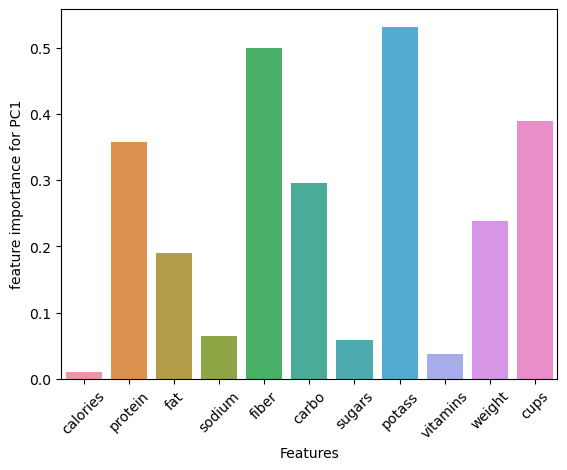

In [32]:
print('A continuación, se muestran los niveles de importancia de las variables para el PC1:')
sns.barplot(data=pc_df.iloc[0:1],errorbar=None)
plt.xlabel('Features')
plt.ylabel('feature importance for PC1')
plt.xticks(rotation=45)

In [36]:
first_component_loadings = pca.components_[0]
nombres_features = X.columns

loadings_df = pd.DataFrame({'Feature': nombres_features, 'Loading': first_component_loadings})
sorted_loadings = loadings_df.reindex(loadings_df.Loading.abs().sort_values(ascending=False).index)

top_3 = sorted_loadings.head(3)
print('A continuación, se muestran, numéricamente, las 3 variables más importantes para el PC1:')
print(top_3)

A continuación, se muestran, numéricamente, las 3 variables más importantes para el PC1:
   Feature   Loading
7   potass  0.531454
4    fiber  0.499986
10    cups -0.388687


Con base en el gráfico y el cálculo previo, se puede observar que las 3 variables que poseen mayor importancia para el componente principal 1 o PC1, **son potasio, fibra y tazas.**

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

No todas las variables son predictoras, como name que representa el nombre o type, en la cual todos los registros tienen el valor C y solo uno H. Dado esto se decide utilizar 'mfr' y 'shelf' como variables predictoras, y debido a la baja cardinalidad de estas 2 variables se utiliza el motodo One-Hot Encoding, el cual nos ayuda ya que no existe un orden inherente y podemos evitar la multicolinealidad.

In [25]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(cereals_df[['mfr', 'shelf']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
print('A continuación, se muestran las variables categóricas predictoras codificadas con one-hot encoding:')
print(encoded_df.head())

A continuación, se muestran las variables categóricas predictoras codificadas con one-hot encoding:
   mfr_G  mfr_K  mfr_N  mfr_P  mfr_Q  mfr_R  shelf_2  shelf_3
0    0.0    0.0    1.0    0.0    0.0    0.0      0.0      1.0
1    0.0    0.0    0.0    0.0    1.0    0.0      0.0      1.0
2    0.0    1.0    0.0    0.0    0.0    0.0      0.0      1.0
3    0.0    1.0    0.0    0.0    0.0    0.0      0.0      1.0
4    1.0    0.0    0.0    0.0    0.0    0.0      0.0      0.0


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [26]:
#Se crea un nuevo dataframe únicamente con los principales componentes que acumulan una varianza del 90 %
if pc_90_df.shape[1] == X_scaled_df.T.shape[0]:
    values = np.dot(pc_90_df.to_numpy(), X_scaled_df.T.to_numpy())
    pc_proy_df = pd.DataFrame(values.T)
    print('A continuación, se muestra un nuevo dataframe únicamente con las proyecciones de las columnas:')
    print(pc_proy_df.head())

A continuación, se muestra un nuevo dataframe únicamente con las proyecciones de las columnas:
          0         1         2         3         4         5         6
0  1.816099 -1.435088 -0.600615 -0.060580 -1.914300 -1.292922 -0.778539
1  0.749583  0.306345 -0.377831  1.726192 -0.102603 -0.551193  0.391356
2  2.152168 -1.019630  0.095000  0.251669 -1.605816  0.135538 -0.409323
3  3.261909 -2.357088 -0.775302 -0.731729 -1.715723 -1.446630 -0.186819
4 -0.779539  0.294125 -0.222541  0.244999 -0.496181  0.128910 -0.283673


In [27]:
final_df = pd.concat([pc_proy_df, encoded_df, Y], axis=1)
print('A continuación, se muestra el dataframe resultante:')
final_df

A continuación, se muestra el dataframe resultante:


,0,1,2,3,4,5,6,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,shelf_2,shelf_3,rating
0,1.816099,-1.435088,-0.600615,-0.060580,-1.914300,-1.292922,-0.778539,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,68.402973
1,0.749583,0.306345,-0.377831,1.726192,-0.102603,-0.551193,0.391356,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,33.983679
2,2.152168,-1.019630,0.095000,0.251669,-1.605816,0.135538,-0.409323,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,59.425505
3,3.261909,-2.357088,-0.775302,-0.731729,-1.715723,-1.446630,-0.186819,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,93.704912
4,-0.779539,0.294125,-0.222541,0.244999,-0.496181,0.128910,-0.283673,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-0.593266,-0.023588,0.244085,-0.286083,0.214456,0.949345,-0.475107,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.106174
70,-1.353021,0.111561,-0.529558,-0.610442,-0.301017,-0.368225,-0.007758,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.753301
71,0.319095,-0.364572,0.186644,-0.003288,-0.170910,0.542795,-0.374549,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49.787445
72,0.805604,-0.381816,0.168582,0.085860,0.414301,0.467971,0.581036,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.592193


In [28]:
#Se guarda en un archivo .csv el dataframe final_df
final_df.to_csv('final_df.csv', index_label='index')